# **PARROT**
This notebook includes the necessary Python code to reproduce the figures in the manuscript.

In [63]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import math
from scipy.stats import linregress, spearmanr, pearsonr
from sklearn.metrics import roc_curve, auc

**Figure 2:**

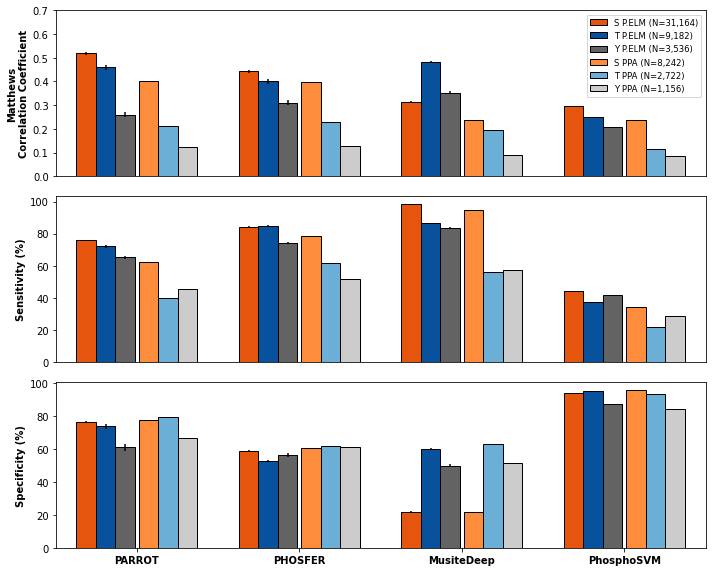

In [2]:
# Panels B-D:
# Color scheme (hexcodes)
dark_orange = '#e6550d'
light_orange = '#fd8d3c'
dark_blue = '#08519c'
light_blue = '#6baed6'
dark_gray = '#636363'
light_gray = '#cccccc'

# Bar graph labels
labels=['PARROT', 'PHOSFER', 'MusiteDeep', 'PhosphoSVM']

# Read in data to DataFrame
df = pd.read_csv('predictor_performance_summary.csv')

# Subset DataFrame into groups to be graphed together
mean_pelm_S = df[(df['dataset'] == 'PELM') & (df['res'] == 'S') & (df['value'] == 'mean')]
stderr_pelm_S = df[(df['dataset'] == 'PELM') & (df['res'] == 'S') & (df['value'] == 'stderr')]
mean_ppa_S = df[(df['dataset'] == 'PPA') & (df['res'] == 'S') & (df['value'] == 'mean')]

mean_pelm_T = df[(df['dataset'] == 'PELM') & (df['res'] == 'T') & (df['value'] == 'mean')]
stderr_pelm_T = df[(df['dataset'] == 'PELM') & (df['res'] == 'T') & (df['value'] == 'stderr')]
mean_ppa_T = df[(df['dataset'] == 'PPA') & (df['res'] == 'T') & (df['value'] == 'mean')]

mean_pelm_Y = df[(df['dataset'] == 'PELM') & (df['res'] == 'Y') & (df['value'] == 'mean')]
stderr_pelm_Y = df[(df['dataset'] == 'PELM') & (df['res'] == 'Y') & (df['value'] == 'stderr')]
mean_ppa_Y = df[(df['dataset'] == 'PPA') & (df['res'] == 'Y') & (df['value'] == 'mean')]

# Main plotting function
def plot_peformance_bars(ax, col_name, ylabel, title, xticklabels=True, legend=True):
    x = np.arange(len(labels))  # the label locations
    width = 0.12  # the width of the bars

    pelm_S = ax.bar(x - 2.6*width, mean_pelm_S[col_name].values, width, 
                    yerr=np.append(stderr_pelm_S[col_name].values, 0), 
                    color=dark_orange, linewidth=1, edgecolor='black', 
                    label='S P.ELM (N=31,164)')
    pelm_T = ax.bar(x - 1.6*width, mean_pelm_T[col_name].values, width, 
                    yerr=np.append(stderr_pelm_T[col_name].values, 0), 
                    color=dark_blue, linewidth=1, edgecolor='black', 
                    label='T P.ELM (N=9,182)')
    pelm_Y = ax.bar(x - 0.6*width, mean_pelm_Y[col_name].values, width, 
                    yerr=np.append(stderr_pelm_Y[col_name].values, 0), 
                    color=dark_gray, linewidth=1, edgecolor='black', 
                    label='Y P.ELM (N=3,536)')
    ppa_S = ax.bar(x + 0.6*width, mean_ppa_S[col_name].values, width, 
                    color=light_orange, linewidth=1, edgecolor='black', 
                    label='S PPA (N=8,242)')
    ppa_T = ax.bar(x + 1.6*width, mean_ppa_T[col_name].values, width, 
                    color=light_blue, linewidth=1, edgecolor='black', 
                    label='T PPA (N=2,722)')
    ppa_Y = ax.bar(x + 2.6*width, mean_ppa_Y[col_name].values, width, 
                    color=light_gray, linewidth=1, edgecolor='black', 
                    label='Y PPA (N=1,156)')

    if xticklabels:
        ax.set_xticks(x)
        ax.set_xticklabels(labels, fontweight='bold')
    else:
        ax.get_xaxis().set_ticks([])
    # ax.set_title(title)
    ax.set_xlim([-0.5, 3.5])
    # ax.yaxis.set_tick_params(fontweight='bold')
    ax.set_ylabel(ylabel, fontweight='bold')
    if legend:
        ax.set_ylim([0, 0.7])
        ax.legend(loc='upper right', fontsize=8.5)
        # ax.legend(bbox_to_anchor=(1.02,0.5), loc="center left", edgecolor='black')
        
        
# Call this function for each subplot B, C, and D
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
plot_peformance_bars(axs[0], 'MCC', 'Matthews\nCorrelation Coefficient', 'Matthews Correlation Coefficient', xticklabels=False, legend=True)
plot_peformance_bars(axs[1], 'sensitivity', 'Sensitivity (%)', 'Sensitivity', xticklabels=False, legend=False)
plot_peformance_bars(axs[2], 'specificity', 'Specificity (%)', 'Specificity', legend=False)
plt.tight_layout()

**Figure 3:**

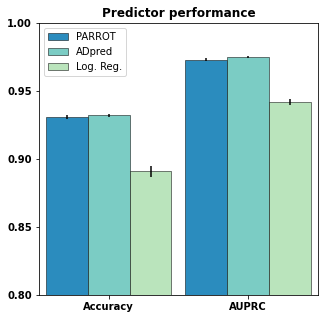

In [3]:
# Panel B:

# Read in data
df = pd.read_csv('AD_prediction_performance_stats.csv')

# Colors / preliminaries:
blue = '#2b8cbe'
m_green = '#7bccc4'
l_green = '#bae4bc'
labels=['Accuracy', 'AUPRC']
x = np.arange(len(labels))
width = 0.3

# Get datapoints associated with full dataset
datapoints = df[df['size'] == 75846]
parrot = datapoints[datapoints['dataset'] == 'PARROT']
ADpred = datapoints[datapoints['dataset'] == 'ADpred']
log_reg = datapoints[datapoints['dataset'] == 'log_reg']

# Bar plot
plt.figure(figsize=(5,5))
plt.bar(x-width, [parrot['acc'].values[0]/100, parrot['AUPRC'].values[0]], width, 
        yerr=[parrot['acc_stderr'].values[0]/100, parrot['AUPRC_stderr'].values[0]], 
        edgecolor='black', linewidth=0.5, color=blue, label='PARROT')
plt.bar(x, [ADpred['acc'].values[0]/100, ADpred['AUPRC'].values[0]], width, 
        yerr=[ADpred['acc_stderr'].values[0]/100, ADpred['AUPRC_stderr'].values[0]], 
        edgecolor='black', linewidth=0.5, color=m_green, label='ADpred')
plt.bar(x+width, [log_reg['acc'].values[0]/100, log_reg['AUPRC'].values[0]], width, 
        yerr=[log_reg['acc_stderr'].values[0]/100, log_reg['AUPRC_stderr'].values[0]], 
        edgecolor='black', linewidth=0.5, color=l_green, label='Log. Reg.')
plt.xticks(x, labels=labels, fontweight='bold')
plt.ylim([0.8, 1.0])
plt.yticks([0.8, 0.85, 0.9, 0.95, 1], fontweight='bold')
plt.title('Predictor performance', fontweight='bold')
plt.xlim([-0.5, 1.5])
plt.legend()

In [21]:
# Run t-test between each of these
from scipy.stats import ttest_ind_from_stats
import math

parrot_acc = parrot['acc'].values[0]
parrot_stddev_acc = parrot['acc_stderr'].values[0] * math.sqrt(5)
parrot_auprc = parrot['AUPRC'].values[0]
parrot_stddev_auprc = parrot['AUPRC_stderr'].values[0] * math.sqrt(5)

ADpred_acc = ADpred['acc'].values[0]
ADpred_stddev_acc = ADpred['acc_stderr'].values[0] * math.sqrt(10)
ADpred_auprc = ADpred['AUPRC'].values[0]
ADpred_stddev_auprc = ADpred['AUPRC_stderr'].values[0] * math.sqrt(10)

log_reg_acc = log_reg['acc'].values[0]
log_reg_stddev_acc = log_reg['acc_stderr'].values[0] * math.sqrt(10)
log_reg_auprc = log_reg['AUPRC'].values[0]
log_reg_stddev_auprc = log_reg['AUPRC_stderr'].values[0] * math.sqrt(10)

print("PARROT vs ADpred")
print('Acc:', ttest_ind_from_stats(mean1=parrot_acc, std1=parrot_stddev_acc, nobs1=5, 
                                   mean2=ADpred_acc, std2=ADpred_stddev_acc, nobs2=10))
print('AUPRC:', ttest_ind_from_stats(mean1=parrot_auprc, std1=parrot_stddev_auprc, nobs1=5, 
                                     mean2=ADpred_auprc, std2=ADpred_stddev_auprc, nobs2=10))

print("\nPARROT vs log_reg")
print('Acc:', ttest_ind_from_stats(mean1=parrot_acc, std1=parrot_stddev_acc, nobs1=5, 
                                   mean2=log_reg_acc, std2=log_reg_stddev_acc, nobs2=10))
print('AUPRC:', ttest_ind_from_stats(mean1=parrot_auprc, std1=parrot_stddev_auprc, nobs1=5, 
                                     mean2=log_reg_auprc, std2=log_reg_stddev_auprc, nobs2=10))


PARROT vs ADpred
Acc: Ttest_indResult(statistic=-0.5864429587908806, pvalue=0.5676218933392544)
AUPRC: Ttest_indResult(statistic=-1.2787572583513127, pvalue=0.22333951486937562)

PARROT vs log_reg
Acc: Ttest_indResult(statistic=6.853743726706158, pvalue=1.1637065421856218e-05)
AUPRC: Ttest_indResult(statistic=10.5239510688377, pvalue=9.91719466356255e-08)


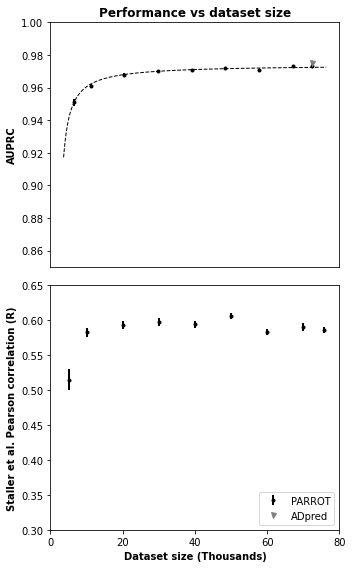

In [34]:
# Panel D / Supplemental Figure 1:

def fit_hyperbola(x, y, x_range):
    # Hyperbola curve fitting
    # y = (m * x) / (k + x)
    inv_x = 1 / x
    inv_y = 1 / y
    slope, intercept = np.polyfit(inv_x, inv_y, 1)
    m = 1 / intercept
    k = slope*m
    ys = (m * x_range) / (k + x_range)
    return ys

# Get data subsets
parrot = df[df['dataset'] == 'PARROT']
combined = df[df['dataset'] == 'PARROT_combined']

fig, axs = plt.subplots(2, 1, figsize=(5,8))
                        
# Plot AUPRC vs dataset size
x_hyperbola = np.linspace(2000, 80000, 400)
y_hyperbola_auprc = fit_hyperbola(parrot['size'].values, parrot['AUPRC'].values, x_hyperbola)
                        
axs[0].plot(x_hyperbola, y_hyperbola_auprc, 'k--', linewidth=1)
axs[0].errorbar(parrot['size'].values, parrot['AUPRC'].values, 
                yerr=parrot['AUPRC_stderr'].values, fmt='ko', 
                markersize=3, linewidth=2)
axs[0].errorbar(ADpred['size'].values, ADpred['AUPRC'].values, 
                yerr=ADpred['AUPRC_stderr'].values, c='gray', 
                fmt='v', markersize=5)

axs[0].set_ylabel('AUPRC', fontweight='bold')
axs[0].set_ylim([0.85, 1.0])
axs[0].set_xticks([])
axs[0].set_title('Performance vs dataset size', fontweight='bold')

# Plot performance on Staller data                        
axs[1].errorbar(parrot['size'].values, parrot['StallerR'].values, 
                yerr=parrot['StallerR_stderr'].values, fmt='ko', 
                markersize=3, linewidth=2, label='PARROT')
axs[1].errorbar(ADpred['size'].values, ADpred['StallerR'].values, 
                c='gray', fmt='v', markersize=5, label='ADpred')
axs[1].set_xlabel('Dataset size (Thousands)', fontweight='bold')
axs[1].set_ylabel("Staller et al. Pearson correlation (R)", fontweight='bold')
axs[1].set_xticks([0, 20000, 40000, 60000, 80000])
axs[1].set_xticklabels(['0', '20', '40', '60', '80'])
axs[1].set_ylim([0.3, 0.65])

"""
# Uncomment this to plot Supplemental Figure 1
axs[0].errorbar(combined['size'].values, combined['AUPRC'].values, 
                yerr=combined['AUPRC_stderr'].values, fmt='rx', 
                markersize=4, linewidth=1)
axs[0].plot(x_hyperbola, fit_hyperbola(combined['size'].values, 
                combined['AUPRC'].values, x_hyperbola), 'r--', linewidth=1)
axs[1].errorbar(combined['size'].values, combined['StallerR'].values, 
                yerr=combined['StallerR_stderr'].values, fmt='rx', 
                markersize=5, linewidth=1, label='combined')
"""

axs[1].legend(loc='lower right')
plt.tight_layout()


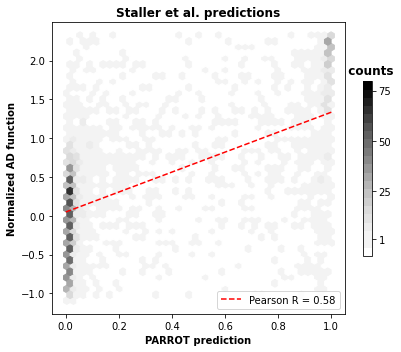

In [76]:
# Panel C:

# Read in Staller data and PARROT predictions
def read_file(filename):
    with open(filename) as f:
        values = [float(x.rstrip().split()[2]) for x in f]
    return np.array(values)

true_vals = read_file('staller_yeast_ad_data.tsv')
parrot_preds = read_file('parrot_predictions_staller_data.tsv')
slope, intercept, r_value, p_value, std_err = linregress(parrot_preds, true_vals)
spearman_r, pval = spearmanr(parrot_preds, true_vals)

# Color bar bounds
bounds1= np.linspace(0, 1, 2)
bounds2 = np.linspace(1, 80, 20)
bounds = np.concatenate((bounds1, bounds2))
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

# Plot
fig, ax = plt.subplots(figsize=(6,5))
hb = ax.hexbin(parrot_preds, true_vals, gridsize=40, cmap='Greys', norm=norm)
ax.plot([0,1], [intercept, intercept+slope], 'r--', label='Pearson R = %.2f' % r_value)
# ax.plot([1], [-1], 'w', label='Spearman R = %.2f' % spearman_r)

cb = fig.colorbar(hb, ax=ax, ticks=[1, 25, 50, 75], shrink=0.6)
cb.ax.set_title('  counts', fontweight='bold')

ax.legend(loc='lower right')
ax.set_title('Staller et al. predictions', fontweight='bold')
ax.set_xlabel('PARROT prediction', fontweight='bold')
ax.set_ylabel('Normalized AD function', fontweight='bold')

plt.tight_layout()

**Figure 4:**

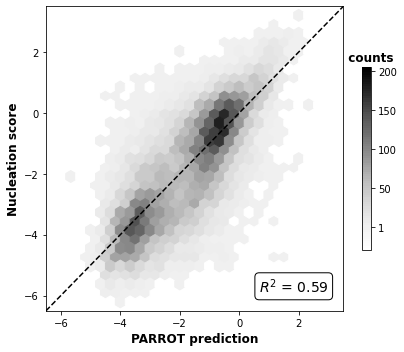

In [77]:
# Panel B:

def parse_predictions_file(file):
    with open(file) as f:
        lines = [x.rstrip().split() for x in f]
    pred_data = []
    for i in range(0, len(lines), 2):
        pred_data.append([lines[i][0][:-5], lines[i][1], lines[i][2], lines[i+1][2]])
    return pred_data

# Read in data
data = parse_predictions_file('merged_predictions.tsv')
df = pd.DataFrame(data, columns=['name', 'seq', 'pred', 'true'])

# Sort data into single and double mutants sets
single_mask = df['name'].str.len() < 5
double_mask = df['name'].str.len() > 5
singles_df = df.loc[single_mask]
doubles_df = df.loc[double_mask]

# Helper function - R^2
def get_r_squared(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return r_value ** 2

# Function for plotting 
def hex_scatter(x, y, plot_range, gridsize, title, x_label, 
                y_label, num_lower, num_upper, upper_bound, 
                tick_labels):
    
    r_squared = get_r_squared(x, y)

    bounds1= np.linspace(0, 1, num_lower)
    bounds2 = np.linspace(1, upper_bound, num_upper)
    bounds = np.concatenate((bounds1, bounds2))
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

    fig, ax = plt.subplots(figsize=(6,5))
    hb = ax.hexbin(x, y, gridsize=gridsize, cmap='Greys', 
                   extent=plot_range*2, norm=norm)
    
    # Line of perfect prediction
    ax.plot(plot_range, plot_range, 'k--')
    
    # Display R^2 value
    ax.annotate('$R^2$ = %.2f' % r_squared, xy=(0.95, 0.05), 
                xycoords='axes fraction',
                size=14, ha='right', va='bottom',
                bbox=dict(boxstyle='round', fc='w'))

    ax.set_title(title, fontweight='bold', fontsize=14)
    ax.set_xlabel(x_label, fontweight='bold', fontsize=12)
    ax.set_ylabel(y_label, fontweight='bold', fontsize=12)
    ax.set(xlim=plot_range, ylim=plot_range)
    cb = fig.colorbar(hb, ax=ax, ticks=tick_labels, shrink=0.6)
    cb.ax.set_title('  counts', fontweight='bold')

    plt.tight_layout()

# Plot Panel B:
hex_scatter(df['pred'].values.astype(np.float), 
            df['true'].values.astype(np.float), 
            [-6.5, 3.5], gridsize=30, title='', 
            x_label='PARROT prediction', y_label='Nucleation score',
            num_lower=10, num_upper=70, upper_bound=205, 
            tick_labels=[1, 50, 100, 150, 200])

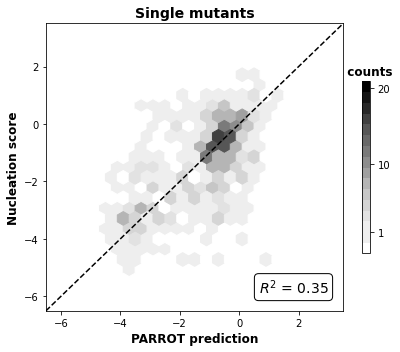

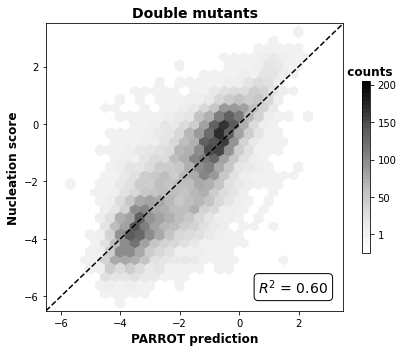

In [78]:
# Supplemental Figure 2:
hex_scatter(singles_df['pred'].values.astype(np.float), 
            singles_df['true'].values.astype(np.float), 
            [-6.5, 3.5], gridsize=25, title='Single mutants', 
            x_label='PARROT prediction', y_label='Nucleation score',
            num_lower=2, num_upper=15, upper_bound=21, 
            tick_labels=[1, 10, 20])

hex_scatter(doubles_df['pred'].values.astype(np.float), 
            doubles_df['true'].values.astype(np.float), 
            [-6.5, 3.5], gridsize=30, title='Double mutants', 
            x_label='PARROT prediction', y_label='Nucleation score',
            num_lower=5, num_upper=40, upper_bound=205, 
            tick_labels=[1, 50, 100, 150, 200])

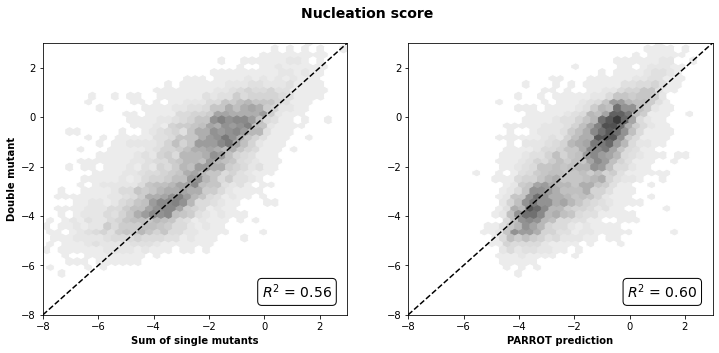

In [82]:
# Panel C: "epistasis"
# TODO: clean up this function
def graph_epistasis(singles_df, doubles_df, mode='sum'):
    # Make data structure with single mutants true values
    single_muts = []
    for i in range(42):
        single_muts.append({})
    for i in range(len(singles_df)):
        mut = singles_df.iloc[i]
        aa = mut['name'][-1]
        pos = int(mut['name'][1:-1])
        single_muts[pos-1][aa] = float(mut['true'])

    true = []
    non_epistatic = []
    epi_true = []
    epi_pred = []

    # Plot double mutants that are two observed single muts
    for i in range(len(doubles_df)):
        dmut = doubles_df.iloc[i]
        names = dmut['name'].split('_')

        indiv_muts = []
        for name in names:
            aa = name[-1]
            pos = int(name[1:-1])

            if aa in single_muts[pos-1]:
                indiv_muts.append(single_muts[pos-1][aa])

        if len(indiv_muts) == 2:
            true.append(float(dmut['true']))

            # SUM MEAN MIN MAX
            if mode=='sum':
                non_epistatic.append(np.sum(indiv_muts))
                label_txt = 'Sum of single mutants'
            elif mode=='avg':
                non_epistatic.append(np.mean(indiv_muts))
                label_txt = 'Avg of single mutants'
            elif mode == 'min':
                non_epistatic.append(np.min(indiv_muts))
                label_txt = 'Min of single mutants'
            elif mode == 'max':  
                non_epistatic.append(np.max(indiv_muts))
                label_txt = 'Max of single mutants'
            else:
                return 1 
           
            if np.abs(float(dmut['true']) - np.sum(indiv_muts)) > -1:
                epi_true.append(float(dmut['true']))
                epi_pred.append(float(dmut['pred']))
        else:
            print(names)


    # Plot
    bounds1= np.linspace(0, 1, 5)
    bounds2 = np.linspace(1, 155, 30)
    bounds = np.concatenate((bounds1, bounds2))
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    plt.suptitle('Nucleation score', size=14, fontweight='bold')
    axs[0].plot([-8,3], [-8, 3], 'k--')
    axs[0].hexbin(non_epistatic, true, gridsize=40, cmap='Greys', 
                    extent=(-8,3,-8,3), norm=norm)
    axs[0].set(xlim=[-8, 3], ylim=[-8, 3])
    # axs[0].set_suptitle('Nucleation score', size=14, fontweight='bold')
    axs[0].annotate('$R^2$ = %.2f' % get_r_squared(non_epistatic, true),
                    xy=(0.95, 0.05), xycoords='axes fraction', size=14,
                    ha='right', va='bottom', bbox=dict(boxstyle='round', fc='w'))
    axs[0].set_xlabel(label_txt, fontweight='bold')
    axs[0].set_ylabel('Double mutant', fontweight='bold')


    axs[1].plot([-8,3], [-8, 3], 'k--')
    hb = axs[1].hexbin(epi_pred, epi_true, gridsize=40, cmap='Greys', 
                    extent=(-8,3,-8,3), norm=norm)
    axs[1].set(xlim=[-8, 3], ylim=[-8, 3])
    axs[1].annotate('$R^2$ = %.2f' % get_r_squared(epi_pred, epi_true),
                    xy=(0.95, 0.05), xycoords='axes fraction', size=14,
                    ha='right', va='bottom', bbox=dict(boxstyle='round', fc='w'))
    axs[1].set_xlabel('PARROT prediction', fontweight='bold')
    
    # Uncomment to display colorbar
#     cb = fig.colorbar(hb, ax=axs[1], ticks=[1, 50, 100, 150], shrink=0.6)
#     cb.ax.set_title('counts', fontweight='bold')
    
    return non_epistatic, epi_pred, true

x1, x2, y = graph_epistasis(singles_df, doubles_df, mode='sum')

In [50]:
import scipy.stats as st

def correlation_bootstrap(x1, x2, y):
    nobs = len(y)
    
    diffs = []
    for i in range(10000):
        samp = np.random.choice(nobs, size=nobs, replace=True)
        cor1 = pearsonr(x1[samp], y[samp])[0]
        cor2 = pearsonr(x2[samp], y[samp])[0]
        diffs.append(cor2 - cor1)
    
    diffs.sort()
    CI_str = '95% CI: (' + str(round(diffs[250], 4)) + ', ' + str(round(diffs[9749], 4)) + ')'
    print(CI_str)
        
correlation_bootstrap(np.array(x1), np.array(x2), np.array(y))

95% CI: (0.0179, 0.0318)


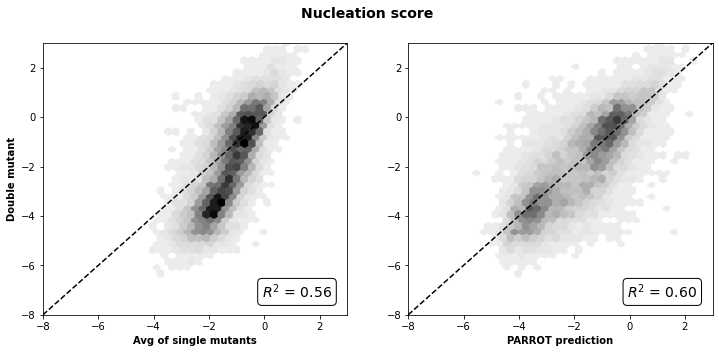

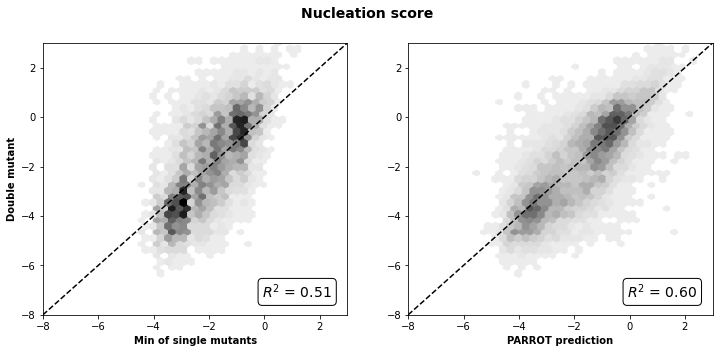

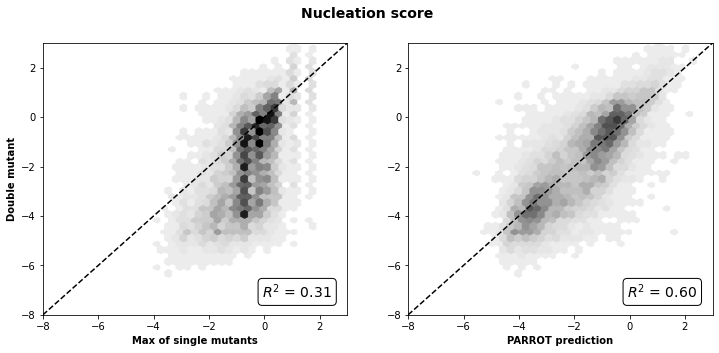

In [103]:
# Supplemental Figure 3
graph_epistasis(singles_df, doubles_df, mode='avg')
graph_epistasis(singles_df, doubles_df, mode='min')
graph_epistasis(singles_df, doubles_df, mode='max')

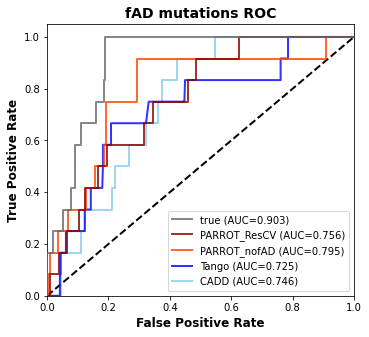

In [62]:
# Panel D: fAD mutant ROC
fAD_dom_mutants = ['H6R', 'D7N', 'D7H', 'E11K', 'K16N', 'A21G', 
                   'E22G', 'E22K', 'E22Q', 'D23N', 'L34V', 'A42T']

# Helper functions
def read_predictions_file(file):
    with open(file) as f:
        lines = [x.strip().split() for x in f]

    df = pd.DataFrame(columns=['name', 'seq', 'true', 'PARROT_ResCV'])
    for i in range(0, len(lines), 2):
        sample = lines[i]
        df = df.append({'name':sample[0][:-5], 'seq':sample[1], 
                'true':float(sample[2]), 'PARROT_ResCV':float(lines[i+1][2])},
                ignore_index=True)
    return df

def convert_name(s):
    return s.replace('-', '')

# Read in PARROT ResCV data
df = read_predictions_file('resCV_single_mutant_predictions.tsv')

# Set 'fAD' column depending on whether mutant is fAD dom mutant
df['fAD'] = 0
for i in range(len(df)):
    if df['name'].iloc[i] in fAD_dom_mutants:
        df.at[i, 'fAD'] = 1
        
# Read in held-out fAD predictions
df_nofAD = pd.read_csv('nofAD_single_mutant_predictions.tsv', 
            sep=' ', names=['name', 'seq', 'PARROT_nofAD'])
df_nofAD = df_nofAD.drop('seq', axis=1)
df = pd.merge(df, df_nofAD, on='name')

# Read in predictions from external predictors
filename = 'predictor_values.tsv'
df2 = pd.read_csv(filename, sep=' ')

single_mask = df2['ID'].str.len() < 7
df2 = df2.loc[single_mask]

df2['name'] = df2['ID'].apply(convert_name)
df2 = df2.drop('ID', axis=1)
df2['Polyphen'] = -1 * df2['Polyphen']
df2['CADD'] = -1 * df2['CADD']
df2['Camsol'] = -1 * df2['Camsol']

df = pd.merge(df, df2, on='name') # Combine with other DataFrame

# plot ROC
# TODO: adjust colors
predictions = ['true', 'PARROT_ResCV', 'PARROT_nofAD', 'Tango', 'CADD']
roc_colors = ['dimgray', 'darkred', 'orangered', 'blue', 'skyblue']
y = df.fAD.values

plt.figure(figsize=(5.5,5))
lw = 2
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('fAD mutations ROC', fontsize=14, fontweight='bold')

for i in range(len(predictions)):
    pred_type = predictions[i]
    color = roc_colors[i]
    scores = df[pred_type].values
    layer = 10 - i

    fpr, tpr, thresholds = roc_curve(y, scores)
    roc_auc = auc(fpr, tpr)

    label_str = '%s (AUC=%.3f)' % (pred_type, roc_auc)
    plt.plot(fpr, tpr, lw=lw, alpha=0.8, c=color, zorder=layer, label=label_str)

plt.legend(loc="lower right", fontsize=10)